<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/marketing_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mall Customers Segmentation

Mall customers data from Kaggle can be found [here](https://www.kaggle.com/shwetabh123/mall-customers)

##Importing necessary packages

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd

In [5]:
#Remove previous versions of the uploaded file
!rm mall_customers.csv

In [6]:
#Uploading file from local drive
from google.colab import files
uploaded1 = files.upload()

Saving mall_customers.csv to mall_customers.csv


In [7]:
#Storing dataset in a Pandas Dataframe
import io
df1 = pd.read_csv(io.BytesIO(uploaded1['mall_customers.csv']))

In [9]:
#Checking the dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Checking the dataframe tail
df1.tail()

,customer_id,gender,age,annual_income,spending_score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


##Mall Customers analytics

In [11]:
#Importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
#from ipywidgets import interact

In [29]:
#Generating descriptive statistics for nummerical data
df1.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
#Generating descriptive statistics for categorical data
df1.describe(include='object')

,gender
count,200
unique,2
top,Female
freq,112


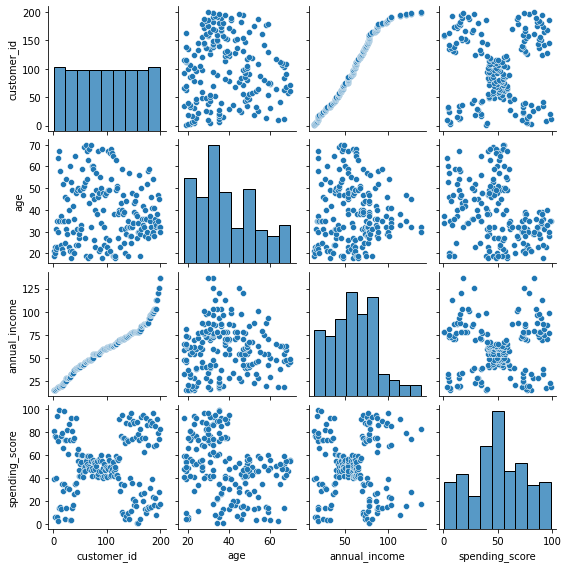

In [19]:
#Performing bi-variate analysis and visualizing relationships
sns.pairplot(data=df1, height=2, aspect=1)
plt.show()

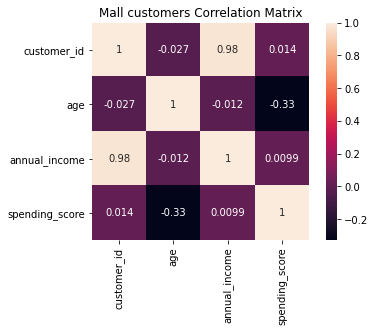

In [24]:
#Visualizing the correlation matrix
sns.heatmap(data=df1.corr(), annot=True, square=True)
plt.title('Mall customers Correlation Matrix')
plt.show()

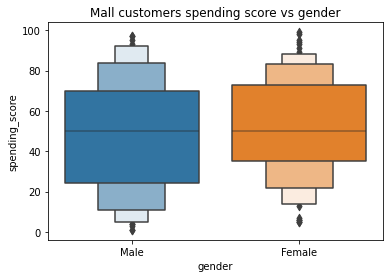

In [30]:
#Comparing male vs female speding score
sns.boxenplot(x='gender', y='spending_score', data=df1)
plt.title('Mall customers spending score vs gender')
plt.show()

##K-means Customer Cluster Analysis

In [31]:
#Importing machine learning libraries
from sklearn.cluster import KMeans

In [32]:
#Slicing data for cluster analysis
df1_cluster = df1[['spending_score', 'annual_income']].copy()
df1_cluster.head()

,spending_score,annual_income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


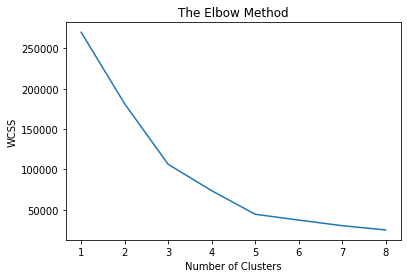

In [37]:
#Using the Elbow Method to find the optimial number of clusters
wcss = [] #==> Within-cluster sum of squares (WCSS) of the distances of each data point in all clusters to their respective centroids

for i in range(1, 9):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(df1_cluster)
  wcss.append(kmeans.inertia_) #==> Sum of squared distances of samples to their closest cluster center.

plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
#Training the modelon the dataframe with Number of Clusters = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(df1_cluster)
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

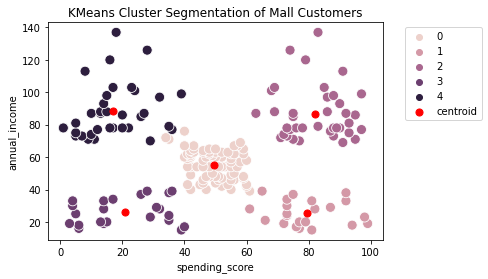

In [60]:
#Plottig the 5 clusters for mall customers
df1_cluster['y_kmeans'] = y_kmeans
sns.scatterplot(x='spending_score', y='annual_income', data=df1_cluster, hue='y_kmeans', s=100)
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], s=50, c='red', label='centroid')
plt.title('KMeans Cluster Segmentation of Mall Customers')
plt.legend(bbox_to_anchor=(1.05, 1)) #==> Set legend outside the chart
plt.show()

In [55]:
kmeans.cluster_centers_[:,0]

array([49.51851852, 79.36363636, 82.12820513, 20.91304348, 17.11428571])